This is the 1st Project for Data Cleaning - Transformation - Analysis in VS Code with Python.

We have created our Kernel - Virtual Environment with command prompt and installed all necessary libraries.

Extra plug-ins data wrangler for better data structure and pattern understanting.

Our dataset contains data for 1 year, 11 columns and 10k records.

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
%cd C:\Users\lefte\datasets


C:\Users\lefte\datasets


*  Data Exploration Part *

In [60]:
silver_fraud_data = pd.read_csv('fraud_analysis.csv')
silver_fraud_data.head() # open with dara wrangler notebook to see the data structure and identify any issues or patterns in the data.

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
0,1,1082,2027,5758.59,2023-01-01 00:00:00,0,MasterCard,City-30,Gas Station,43,Purchase at Merchant-2027
1,2,1015,2053,1901.56,2023-01-01 00:00:01,1,Visa,City-47,Online Shopping,61,Purchase at Merchant-2053
2,3,1004,2035,1248.86,2023-01-01 00:00:02,1,MasterCard,City-6,Gas Station,57,Purchase at Merchant-2035
3,4,1095,2037,7619.05,2023-01-01 00:00:03,1,Discover,City-6,Travel,59,Purchase at Merchant-2037
4,5,1036,2083,1890.10,2023-01-01 00:00:04,1,MasterCard,City-34,Retail,36,Purchase at Merchant-2083


In [61]:
#assign dataset to new data to keep the original data intact
gold_fraud_data = silver_fraud_data.copy()
gold_fraud_data.info() # check variables/column types and number of records in the dataset. This will help us identify any data cleaning or preprocessing steps that may be necessary before conducting our analysis.

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           10000 non-null  int64  
 1   customer_id              10000 non-null  int64  
 2   merchant_id              10000 non-null  int64  
 3   amount                   10000 non-null  float64
 4   transaction_time         10000 non-null  str    
 5   is_fraudulent            10000 non-null  int64  
 6   card_type                10000 non-null  str    
 7   location                 10000 non-null  str    
 8   purchase_category        10000 non-null  str    
 9   customer_age             10000 non-null  int64  
 10  transaction_description  10000 non-null  str    
dtypes: float64(1), int64(5), str(5)
memory usage: 859.5 KB


In [62]:
gold_fraud_data.describe() # get summary statistics for the dataset. This will help us understand the distribution of the data and identify any outliers or anomalies that may be present.
                           # for numeric variables, discrete or continuous.

,transaction_id,customer_id,merchant_id,amount,is_fraudulent,customer_age
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1051.272300,2050.486600,4958.381617,0.506800,44.047500
std,2886.89568,28.864062,28.877801,2899.699675,0.499979,15.321707
min,1.00000,1001.000000,2001.000000,10.610000,0.000000,18.000000
25%,2500.75000,1026.000000,2025.000000,2438.175000,0.000000,31.000000
50%,5000.50000,1052.000000,2050.000000,4943.945000,1.000000,44.000000
75%,7500.25000,1076.000000,2076.000000,7499.312500,1.000000,57.000000
max,10000.00000,1100.000000,2100.000000,9999.750000,1.000000,70.000000


Quick look after describe(): About 50,68% of transactions are fraud. Average age of customers 44. Avg transaction 5k rounded. 

In [63]:
#check for missing values in the dataset

gold_fraud_data.isnull().sum()

#No presence of missing values.

transaction_id             0
customer_id                0
merchant_id                0
amount                     0
transaction_time           0
is_fraudulent              0
card_type                  0
location                   0
purchase_category          0
customer_age               0
transaction_description    0
dtype: int64

In [64]:
#check duplicate records in the dataset.
gold_fraud_data.duplicated().sum()

np.int64(0)

In [65]:
#checking the distinct values. #for categorical variables (str type)
gold_fraud_data.nunique()       


transaction_id             10000
customer_id                  100
merchant_id                  100
amount                      9945
transaction_time           10000
is_fraudulent                  2
card_type                      4
location                      50
purchase_category              6
customer_age                  53
transaction_description      100
dtype: int64

In [66]:
#merchant_id col and transaction_description col describes the same thing, the merchant. So we will drop the 2nd column and keep the merchant_id col since it has less distinct values and is more concise.
gold_fraud_data.drop('transaction_description', axis=1, inplace=True)

In [67]:
# check classes of the card_type variable to see if there are any inconsistencies or errors in the data.
gold_fraud_data['card_type'].unique()



<StringArray>
['MasterCard', 'Visa', 'Discover', 'American Express']
Length: 4, dtype: str

In [68]:
#same as above
gold_fraud_data['purchase_category'].unique()

<StringArray>
['Gas Station', 'Online Shopping', 'Travel', 'Retail', 'Groceries',
 'Restaurant']
Length: 6, dtype: str

* Data Cleaning & Transformation *

Columns:
1. transaction_time: We keep only the date and not the hours-minutes. We won't proceed to such deep analysis to need timestamp.
2. location: We keep the numbers and exclude "City-" for easier analysis and understanding.
3. customer_age: We group the customers into meaningful clusters.

In [69]:
#Transform transaction_time to datetime format 


gold_fraud_data['transaction_time'] = pd.to_datetime(gold_fraud_data['transaction_time'], errors='coerce')
gold_fraud_data["transaction_time"] = gold_fraud_data["transaction_time"].dt.date

In [70]:
# Exluding "City-"  from the location column to get only the city code.
gold_fraud_data["location"] = gold_fraud_data["location"].str.split("-").str[1]

#We rename the column location to city_location for better understanding of the data.
gold_fraud_data.rename(columns={"location": "city_location"}, inplace=True)


In [74]:
gold_fraud_data["customer_age"].describe()

count    10000.000000
mean        44.047500
std         15.321707
min         18.000000
25%         31.000000
50%         44.000000
75%         57.000000
max         70.000000
Name: customer_age, dtype: float64

In [75]:
gold_fraud_data["customer_age"] = pd.cut(gold_fraud_data["customer_age"],bins=[17, 25, 35, 50, 65, 70],     labels=["18-25", "26-35", "36-50", "51-65", "66-70"])

** EDA **

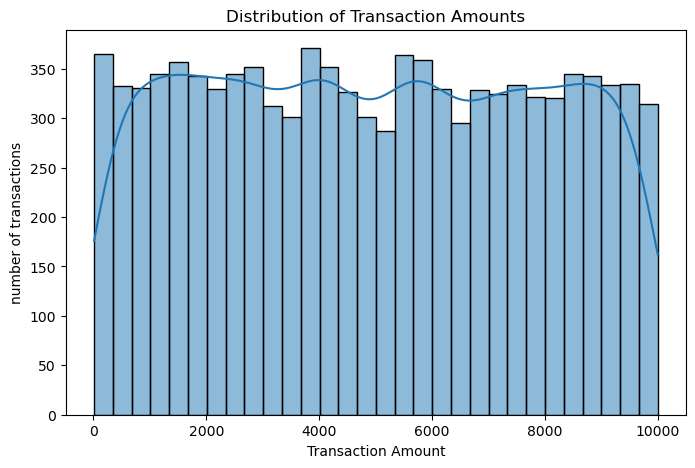

In [ ]:
#Checking the distribution of transaction amounts.
plt.figure(figsize=(8,5))
sns.histplot(gold_fraud_data['amount'], bins=30, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("number of transactions")
plt.show()

#No extreme spikes. Transaction amounts almost evenly distributed. 

In [144]:
#Get number of transactions which are fraud.
fraud_card = (gold_fraud_data[gold_fraud_data['is_fraudulent'] == 1].groupby('card_type').size().sort_values(ascending=False))

In [145]:
#convert to percentage
fraud_card = (fraud_card/100) / sum(fraud_card/100) * 100

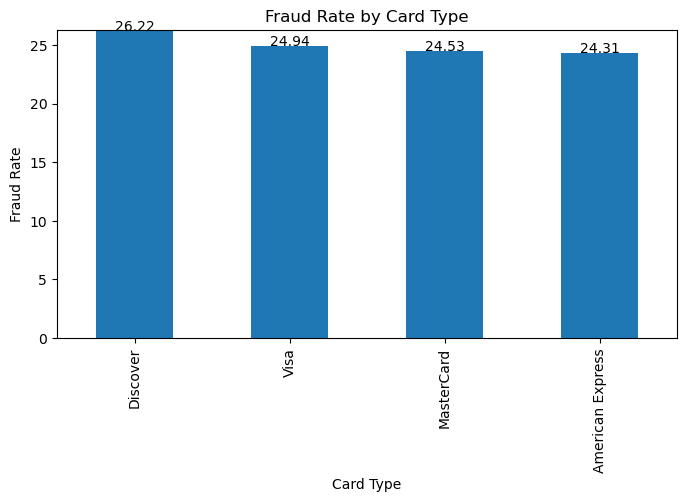

In [ ]:
#Visualizing the fraud rate by card type using a bar chart.
plt.figure(figsize=(8,4))
ax = fraud_card.plot(kind='bar')

plt.title("Fraud Rate by Card Type")
plt.ylabel("Fraud Rate")
plt.xlabel("Card Type")

# Add value labels on top of bars
for i, value in enumerate(fraud_card):ax.text(i, value + 0.005, f"{value:.2f}", ha='center')

plt.ylim(0, fraud_card.max() + 0.05)
plt.show()

#We see that the fraud rate is higher for "Discover" Card while for the  other card types, the fraud rates are relatively similar. 

In [147]:
fraud_customer_age = (gold_fraud_data[gold_fraud_data['is_fraudulent'] == 1].groupby('customer_age').size().sort_values(ascending=False))

In [152]:
fraud_customer_age = (fraud_customer_age/100) / sum(fraud_customer_age/100) * 100 
fraud_customer_age = fraud_customer_age.round(2).sort_index() 
fraud_customer_age


customer_age
18-25    15.79
26-35    18.78
36-50    27.62
51-65    28.37
66-70     9.43
dtype: float64

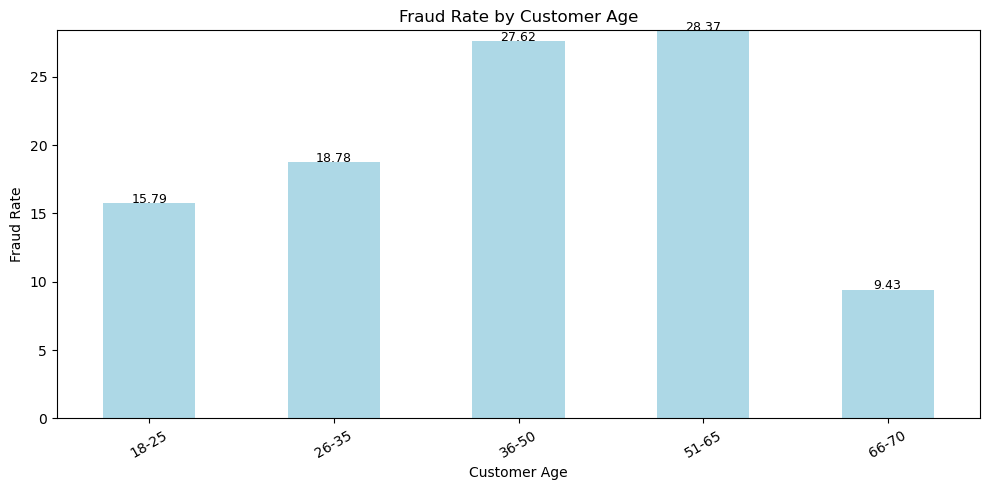

In [ ]:
#Visualizing the fraud rate by customer age using a bar chart.
plt.figure(figsize=(10,5))

fraud_customer_age_sorted = fraud_customer_age.sort_index()

ax = fraud_customer_age_sorted.plot(
    kind='bar',
    color='lightblue',
    width=0.5)

plt.title("Fraud Rate by Customer Age")
plt.ylabel("Fraud Rate")
plt.xlabel("Customer Age")

plt.xticks(rotation=30)

for i, value in enumerate(fraud_customer_age_sorted):ax.text(i, value + 0.002, f"{value:.2f}", ha='center', fontsize=9)

plt.ylim(0, fraud_customer_age_sorted.max() + 0.02)

plt.tight_layout()
plt.show()

#We notice that the fraud rate is higher for the age group 51-65 and 36-50 with 0.28% and 0.27% respectively. 

In [190]:
fraud_city_location = (gold_fraud_data[gold_fraud_data['is_fraudulent'] == 1].groupby('city_location').size().sort_values(ascending=False).head(5))  

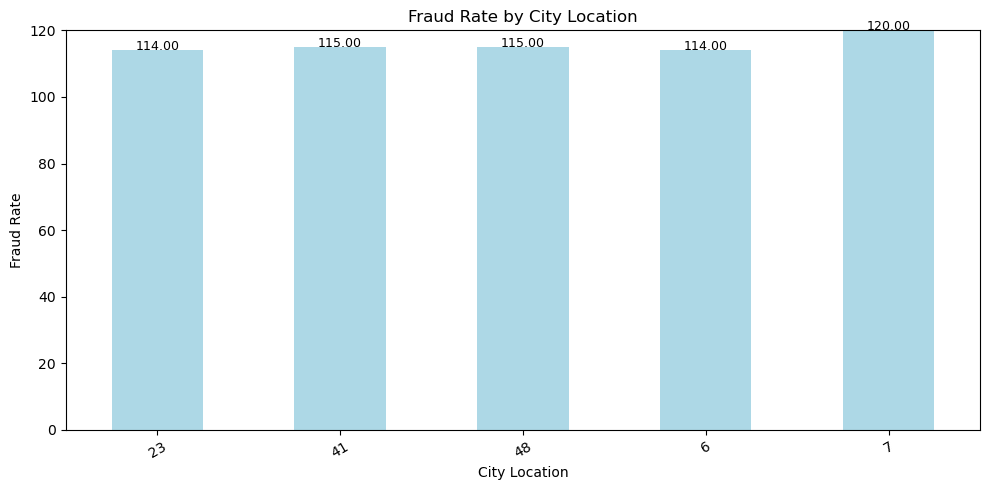

In [ ]:
#Checking the fraud rate by city location.
plt.figure(figsize=(10,5))

fraud_city_location_sorted = fraud_city_location.sort_index()

ax = fraud_city_location_sorted.plot(
    kind='bar',
    color='lightblue',
    width=0.5)

plt.title("Fraud Rate by City Location")
plt.ylabel("Fraud Rate")
plt.xlabel("City Location")

plt.xticks(rotation=30)

for i, value in enumerate(fraud_city_location_sorted):ax.text(i, value + 0.002, f"{value:.2f}", ha='center', fontsize=9)

plt.ylim(0, fraud_city_location_sorted.max() + 0.02)

plt.tight_layout()
plt.show()

#We see that city 7 is the leader of fraud transactions with 120 followed by city 41 and 48 with 115 cases.

In [193]:
fraud_purchase_category = (gold_fraud_data[gold_fraud_data['is_fraudulent'] == 1].groupby('purchase_category').size().sort_values(ascending=False).head(5))  

In [195]:
fraud_purchase_category = (fraud_purchase_category/100) / sum(fraud_purchase_category/100) * 100 
fraud_purchase_category = fraud_purchase_category.round(2).sort_index() 
fraud_purchase_category

purchase_category
Gas Station        20.41
Groceries          20.92
Online Shopping    18.77
Retail             19.92
Travel             19.99
dtype: float64

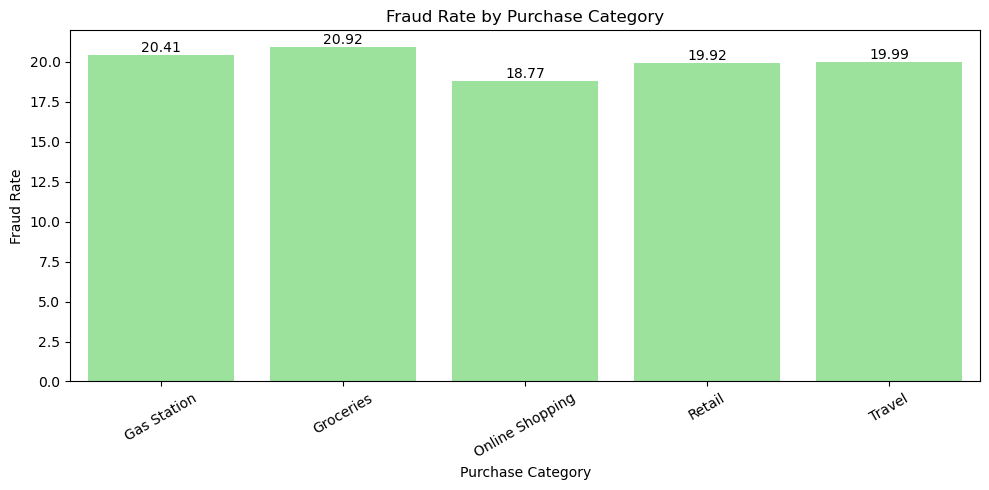

In [202]:
#Checking the fraud rate by purchase category.
fraud_purchase_category_sorted = fraud_purchase_category.sort_index()

plt.figure(figsize=(10,5))

ax = sns.barplot(
    x=fraud_purchase_category_sorted.index,
    y=fraud_purchase_category_sorted.values,
    color='lightgreen'
)

plt.title("Fraud Rate by Purchase Category")
plt.ylabel("Fraud Rate")
plt.xlabel("Purchase Category")
plt.xticks(rotation=30)


for i, value in enumerate(fraud_purchase_category_sorted.values):
    ax.text(i, value, f"{value:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()
#We see that fraud rate is higher for "groceries" and "Gas Station" with almost 21% and 20.4% correspondongly.


In [203]:
gold_fraud_data.groupby('is_fraudulent')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
is_fraudulent,,,,,,,,
0,4932.0,4943.229469,2885.005398,11.33,2450.1100,4958.17,7455.6375,9998.21
1,5068.0,4973.127157,2914.137479,10.61,2421.8225,4922.06,7532.9000,9999.75
